In [1]:
import math
import sys
sys.path.append('../darknight/')
from fcts import array_in_nd_array, remove_space, r2pcorr,struc2mol
import numpy as np
import pandas as pd
import darkchem
import matplotlib.pyplot as plt
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools,Draw
# plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'
#import package
from sklearn import linear_model
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.linear_model import LinearRegression

Using TensorFlow backend.


In [2]:
#load model
model = darkchem.utils.load_model('../Final Trained DarkChem Network Weights/N7b_[M+H]')

In [3]:
data = pd.read_csv('Aromatic_hydrocarbon.csv') # train_data1 is better,

In [4]:
# calculate the vectors of reactants and products
rvec = [darkchem.utils.struct2vec(reactant) for reactant in data['Reactants']]
pvec = [darkchem.utils.struct2vec(product) for product in data['Products']]
# transform the data type to np.array 
# for the calculation of latent space vectors
rvec = np.array(rvec).astype(int)
pvec = np.array(pvec).astype(int)

In [5]:
#generate the latent space representation for reactants and products
r_latent = model.encoder.predict(rvec)
p_latent = model.encoder.predict(pvec)

In [6]:
# transform the data type to DataFrame 
rvecdf = pd.DataFrame(r_latent)
pvecdf = pd.DataFrame(p_latent)

#### The average and std dev of angle and magnitude of vectors

In [7]:
#calculate the latent path vector for the 46 reactions
path = pvecdf - rvecdf

In [8]:
#the average of path vector
path_vec =np.array(path.mean().values)
path_vec

array([ 4.32785321e-03, -9.56029049e-04, -2.64593251e-02,  3.62543538e-02,
       -3.31042856e-02,  2.28673890e-02,  9.69901010e-02,  3.84587012e-02,
       -9.75953136e-03, -1.40143735e-02, -1.93816181e-02, -1.08612338e-02,
       -3.83131281e-02, -3.46497297e-02,  8.58536735e-03, -3.62091064e-02,
        9.54204202e-02,  2.75522862e-02,  1.70181654e-02, -2.78925449e-02,
       -6.09201975e-02, -6.08955137e-02,  1.29526317e-01,  4.94026020e-03,
       -1.91287156e-02,  2.57146172e-02, -6.57552034e-02,  2.84309983e-02,
       -2.87844427e-02, -2.98290178e-02,  2.45631095e-02,  3.18894349e-02,
       -8.66295304e-03,  2.66994704e-02,  3.36726010e-02, -2.51171459e-02,
       -6.19023014e-03, -1.57882599e-03,  1.62669423e-03, -2.77519954e-04,
       -2.73773205e-02, -2.58318824e-03, -1.96556263e-02, -2.42884029e-02,
       -1.00500891e-02, -2.60108635e-02,  2.68095732e-02, -1.04423771e-02,
       -3.78113277e-02, -2.12313905e-02,  2.59768236e-02,  6.51911348e-02,
       -1.82442460e-02, -

Above is the specific value of the average latent path vector.

In [9]:
def difference(lact,lprd):
    """
    Function utilized to calculate the difference between
    the actual and predicted products latent vectors
    """
    d = []
    for i in range(len(lact)):
        s = 0
        for j in range(lact.shape[1]):
            s += (lact.iloc[i][j] - lprd.iloc[i][j])**2
        s = np.sqrt(s)
        d.append(s)
    return d

In [10]:
def vector_magnitude(data):
    """
    A function used to compute the average and std of magnitude of path vectors.
    """
    a = []
    for i in range(len(data)):
        s = 0
        for j in range(data.shape[1]):
            s += (data.iloc[i][j])**2
        s = np.sqrt(s)
        a.append(s)
    aveg = np.average(a)
    std = np.std(a)
    print ('The average magnitude is:',aveg)
    print ('The std magnitude is:',std)
    #return aveg,std

In [11]:
#the average and std of magnitude of path vectors
vector_magnitude(path)

The average magnitude is: 1.7789006181574405
The std magnitude is: 0.0918287871555052


In [12]:
def vector_angle(rct,prd):
    """
    A function used to compute the average and std of angle of path vectors
    """
    #u = []
    #d = []
    angle = []
    for i in range(len(rct)):
        up = 0
        rm = 0
        pm = 0
        for j in range(rct.shape[1]):
            up += rct.iloc[i][j] * prd.iloc[i][j]  #numerator
            rm += (rct.iloc[i][j])**2  # the magnitude of reactant vector
            pm += (prd.iloc[i][j])**2  # the magnitude of product vector
        #u.append(up)
        rm = np.sqrt(rm)
        pm = np.sqrt(pm)
        cos = up/(rm*pm)
        a = math.degrees(math.acos(cos))
        #d.append(rm*pm)
        angle.append(a)
    aveg = np.average(angle)
    std = np.std(angle)
    print('The average angle is:',aveg)
    print('The std angle is:',std)

In [13]:
#the average and std of the angle between products and reactants vectors
vector_angle(rvecdf,pvecdf)

The average angle is: 17.71002198697537
The std angle is: 3.0085084480297577


In [14]:
#load test data
testdf = pd.read_csv('Aromatic_test.csv')

In [15]:
testdf

,Reactants,Products,Predictions,Accuracy,Distance
0,Cc1ccc(CCC=O)cc1,CC1CCC(CCC=O)CC1,CC1CCC(CCC=O)CC1,True,0.000000
1,CCCc1ccc(CCC=O)cc1,CCCC1CCC(CCC=O)CC1,CCCC1CCC(CCC=O)Cc1,True,0.592035
2,CCc1ccc(CCC=O)cc1,CCC1CCC(CCC=O)CC1,CCC1CCC(CCC=O)CC1,True,0.000000
3,O=C1OCCC1c1ccccc1,O=C1OCCC1C1CCCCC1,O=C1OCCC1C1CCCCc1,True,0.637158
4,CN1CCN(c2ccccc2)CC1,CN1CCN(C2CCCCC2)CC1,CN1CCN(C2CCCCC2)CC1,True,0.000000
5,Oc1ccc(OC2CCOC2)cc1,OC1CCC(OC2CCOC2)CC1,OC1CCC(CC1CCOC2CCc1,False,1.519377
6,O=C(O)c1ccc(OCCO)cc1,O=C(O)C1CCC(OCCO)CC1,O=C(O)C1CCC(OCCO)Cc1,True,0.620912
7,COc1ccc(CN)cc1,COC1CCC(CN)CC1,COC1CCC(CN)CC1,True,0.000000
8,O=C(O)C1Cc2ccccc2C1,O=C(O)C1CC2CCCCC2C1,O=C(O/C1CC2CCccc2C1,False,1.704719
9,CC(CO)CCCc1ccccc1,CC(CO)CCCC1CCCCC1,CC(CO)CCCC1CCcCc1,True,0.870146


For the exact predictions, there is still one discrepancy between them and their corresponding actual smile strings. For example, the #2 prediction, the last two characters are 'C1' and 'c1' in Products and Predictions coulumns,respectively. Additionally, this divergence accounts for the fact the distance is bigger than 0 within the true predictions.     

In [16]:
#preparation for  below display 
act = pd.DataFrame(data = testdf['Products'].values, columns = ['smiles'])
prd = pd.DataFrame(data = testdf['Predictions'].values,columns = ['smiles'])
act = struc2mol(act)
prd = struc2mol(prd)

#### Display the actual products smiles strings with their molecule structures

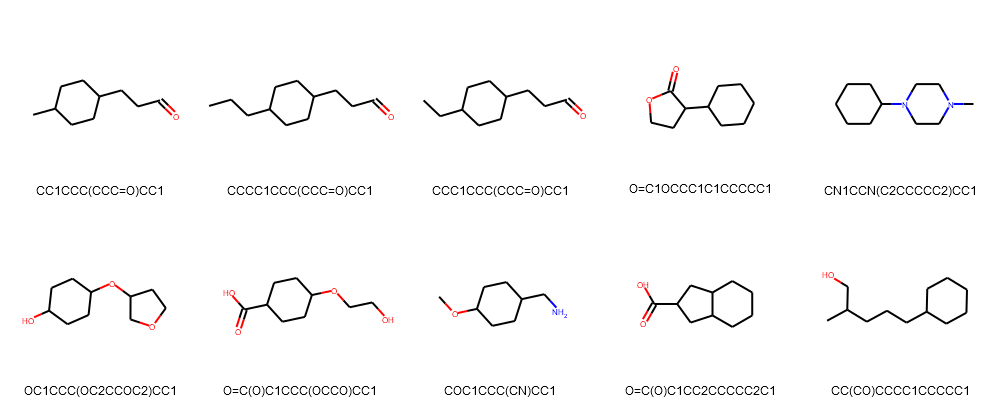

In [17]:
display(PandasTools.FrameToGridImage(act,column='mol', legendsCol='smiles',molsPerRow=5))

#### Display the predicted products smiles strings with their molecule structures(Empty is invalid smiles string)

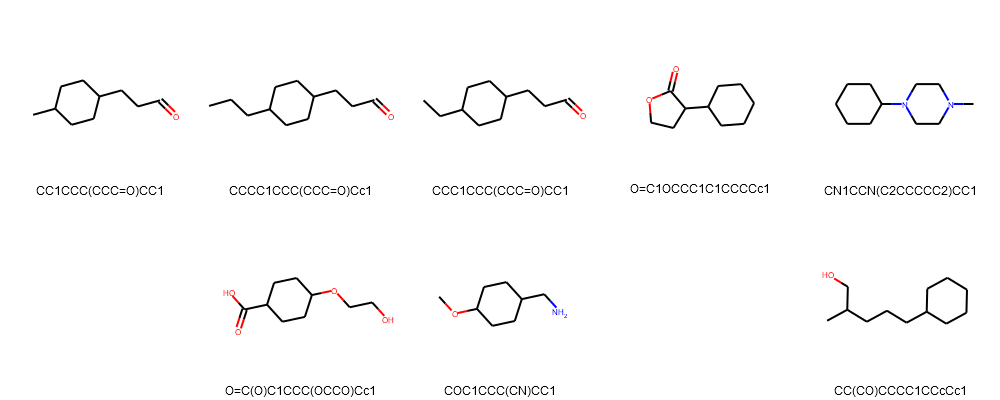

In [18]:
display(PandasTools.FrameToGridImage(prd,column='mol', legendsCol='smiles',molsPerRow=5))

I tested 10 chemical reactions and there are only two predictions are meaningless.
The k value is 10 when using beamsearch function, and the exact smile string is one of the 10 predicted results. Sometimes there will be reiterated smile strings in the consequences, including the corrected one. 

In [19]:
#molecules generated within 1 std dev of the average vector
stdpath_vec = path_vec + 0.0918287871555052
mstdpath_vec = path_vec - 0.0918287871555052

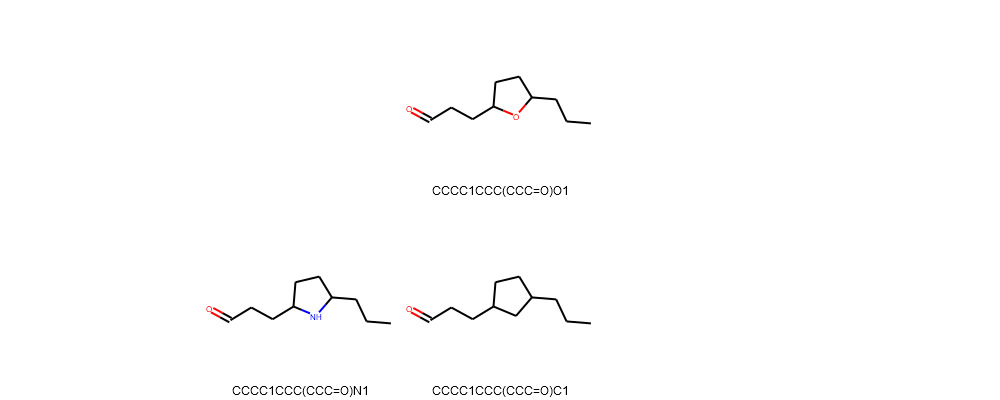

In [20]:
smi = 'CCCc1ccc(CCC=O)cc1' 
test = darkchem.utils.struct2vec(smi)
test = np.array(test)
test = test.reshape(-1,100)
t_l = model.encoder.predict(test)
t_pre = t_l + stdpath_vec
t_pred = model.decoder.predict(t_pre)
trs = darkchem.utils.beamsearch(t_pred, k=10)
trs = trs.flatten()
trs = trs.reshape(-1,100)
v2s = [darkchem.utils.vec2struct(trs[i]) for i in range(len(trs))]
sms = {'smiles': v2s}
sms = pd.DataFrame(data = sms)
df = struc2mol(sms)
display(PandasTools.FrameToGridImage(df,column='mol', legendsCol='smiles',molsPerRow=5))

For this test, the reaction path vector equals the average path vector plus 1std dev. Obviously, it leads to false predictions. 

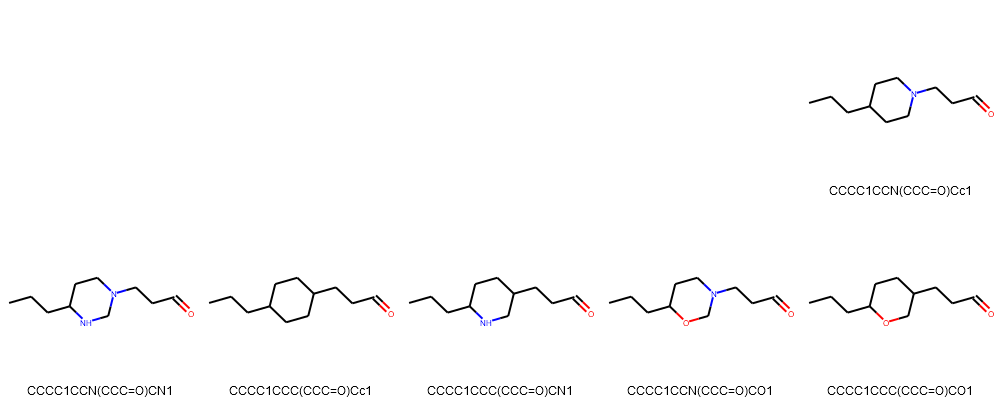

In [21]:
smi = 'CCCc1ccc(CCC=O)cc1' 
test = darkchem.utils.struct2vec(smi)
test = np.array(test)
test = test.reshape(-1,100)
t_l = model.encoder.predict(test)
t_pre = t_l + mstdpath_vec
t_pred = model.decoder.predict(t_pre)
trs = darkchem.utils.beamsearch(t_pred, k=10)
trs = trs.flatten()
trs = trs.reshape(-1,100)
v2s = [darkchem.utils.vec2struct(trs[i]) for i in range(len(trs))]
sms = {'smiles': v2s}
sms = pd.DataFrame(data = sms)
df = struc2mol(sms)
display(PandasTools.FrameToGridImage(df,column='mol', legendsCol='smiles',molsPerRow=5))

For this example, the reaction path vector equals the average path vector minus 1std dev. We can know that it produces correct prediction(the 7th molecule,'CCCC1CCC(CCC=O)Cc1').

However, it doesn't mean the latter reaction path vector(smaller one) is better. Because when I changed a different reactant ie. 'Cc1ccc(CCC=O)cc1', both the above predicitons brought about opposite outcomes. That's to say the former produced the exact prediction while the latter engendered wrong results.